In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
heroes_url = "https://drive.google.com/uc?id=1kgrbMWapAWWjOqUeJoqQVN7Kgh-0GFyD"
powers_url = "https://drive.google.com/uc?id=1CzJ-WTQuZStSJSt_M2HAl61F7djrrC18"

heroes_df = pd.read_csv(heroes_url)
powers_df = pd.read_csv(powers_url)

heroes_df['Race'] = heroes_df['Race'].replace({'-':np.nan})
heroes_df['Alignment'] = heroes_df['Alignment'].replace({'-':np.nan})
heroes_df.head(), powers_df.head()


(          name Gender Eye color               Race Hair color  Height  \
 0       A-Bomb   Male    yellow              Human    No Hair   203.0   
 1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   191.0   
 2     Abin Sur   Male      blue            Ungaran    No Hair   185.0   
 3  Abomination   Male     green  Human / Radiation    No Hair   203.0   
 4      Abraxas   Male      blue      Cosmic Entity      Black   -99.0   
 
            Publisher Skin color Alignment  Weight  
 0      Marvel Comics          -      good   441.0  
 1  Dark Horse Comics       blue      good    65.0  
 2          DC Comics        red      good    90.0  
 3      Marvel Comics          -       bad   441.0  
 4      Marvel Comics          -       bad   -99.0  ,
     hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
 0      3-D Man     True                False               False   
 1       A-Bomb    False                 True               False   
 2   Abe Sapien     True    

In [3]:
# Numerical
print(heroes_df.describe())

# Categorical
print("Most common superhero race:", heroes_df['Race'].mode()[0])
print(heroes_df['Alignment'].value_counts())

# Missing values
print(heroes_df.isnull().sum())

# Fill missing height with median
heroes_df['Height'].fillna(heroes_df['Height'].median(), inplace=True)


           Height      Weight
count  734.000000  732.000000
mean   102.254087   43.855191
std    139.624543  130.823733
min    -99.000000  -99.000000
25%    -99.000000  -99.000000
50%    175.000000   62.000000
75%    185.000000   90.000000
max    975.000000  900.000000
Most common superhero race: Human
Alignment
good       496
bad        207
neutral     24
Name: count, dtype: int64
name            0
Gender          0
Eye color       0
Race          304
Hair color      0
Height          0
Publisher      15
Skin color      0
Alignment       7
Weight          2
dtype: int64


<ipython-input-3-0f630e45b8f3>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heroes_df['Height'].fillna(heroes_df['Height'].median(), inplace=True)


In [4]:
marvel = heroes_df[heroes_df['Publisher'] == 'Marvel Comics']['Height'].dropna()
dc = heroes_df[heroes_df['Publisher'] == 'DC Comics']['Height'].dropna()

t_stat, p_value = stats.ttest_ind(marvel, dc)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")


T-statistic: 4.748, P-value: 0.000


In [5]:
merged_df = heroes_df.merge(powers_df, left_on='name', right_on='hero_names', how='left')
heroes = merged_df[merged_df['Alignment'] == 'good']
villains = merged_df[merged_df['Alignment'] == 'bad']

table = [[heroes['Super Strength'].sum(), len(heroes) - heroes['Super Strength'].sum()],
         [villains['Super Strength'].sum(), len(villains) - villains['Super Strength'].sum()]]

chi2, p, dof, expected = stats.chi2_contingency(table)
print(f"Chi-Square: {chi2:.2f}, P-value: {p:.3f}")


Chi-Square: 18.66, P-value: 0.000


In [6]:
print("P(Super Speed):", powers_df['Super Speed'].mean())
print("P(Flight & Strength):", (powers_df['Flight'] & powers_df['Super Strength']).mean())
print("P(Flight OR Strength):", (powers_df['Flight'] | powers_df['Super Strength']).mean())


P(Super Speed): 0.3733133433283358
P(Flight & Strength): 0.22038980509745126
P(Flight OR Strength): 0.6371814092953523


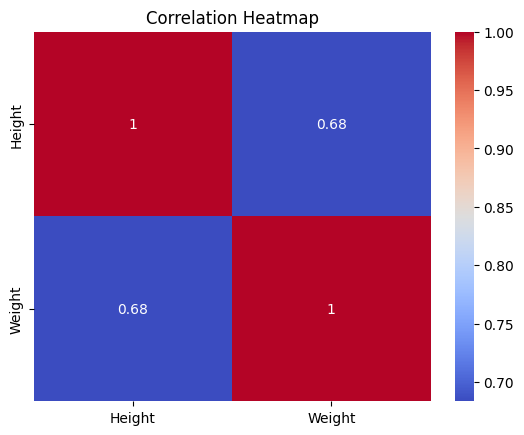

In [7]:
corr_matrix = heroes_df[['Height', 'Weight']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


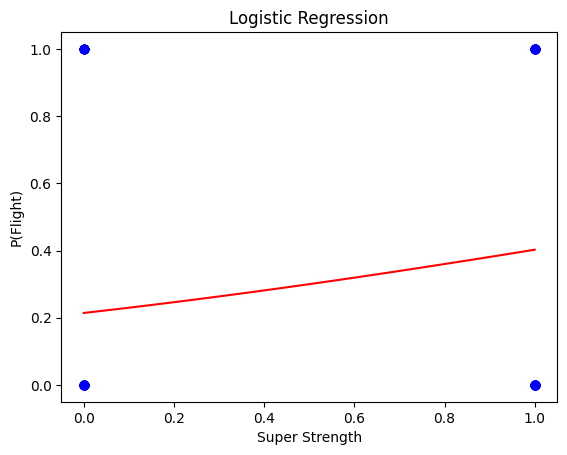

In [8]:
X = powers_df[['Super Strength']].astype(int)
y = powers_df['Flight'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_prob = log_reg.predict_proba(X_test)[:,1]
y_pred = (y_pred_prob >= 0.5).astype(int)

# Plotting
plt.scatter(X_test, y_test, color='blue')
x_vals = np.linspace(0, 1, 100).reshape(-1, 1)
y_vals = log_reg.predict_proba(x_vals)[:,1]
plt.plot(x_vals, y_vals, color='red')
plt.xlabel("Super Strength")
plt.ylabel("P(Flight)")
plt.title("Logistic Regression")
plt.show()
